# Worksheet 15

Name:   Ivan Nikitovic

UID:    U91810047 

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

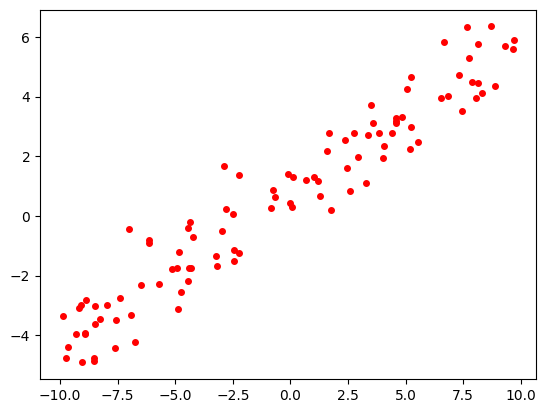

In [1]:
import numpy as np
import matplotlib.pyplot as plt

line = np.array([ 1 , 0.5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin)+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

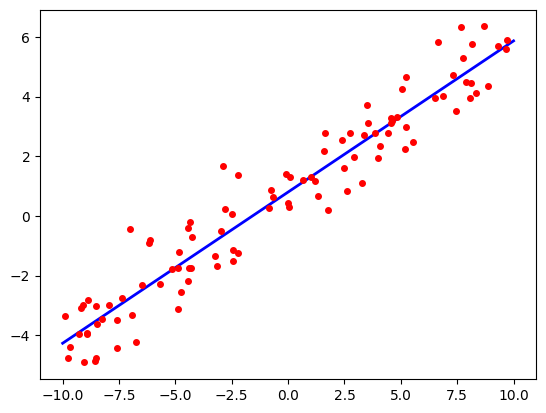

[0.8002379  0.50660407]


In [4]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = np.linalg.inv(np.dot(X.T, X)) @ X.T @ ylin 

xplot = np.linspace(-10,10,50)
yestplot = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()

print(beta)

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

- pretty close

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

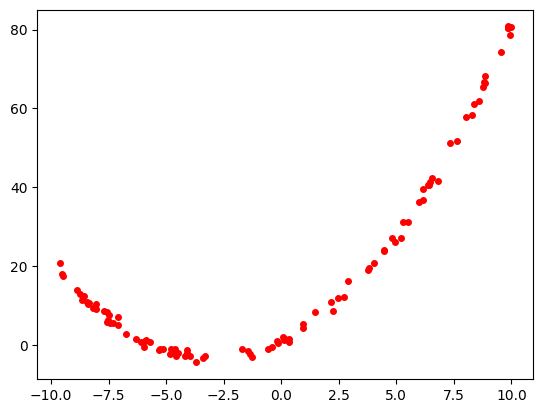

In [7]:
line = np.array([ 1 , 3,  0.5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin)+(line[2]*xlin ** 2)+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

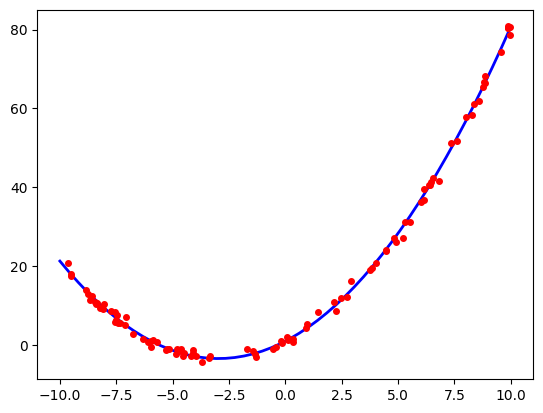

[0.98794279 2.9707659  0.5001202 ]


In [10]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin, xlin ** 2]).T
beta = np.linalg.inv(np.dot(X.T, X)) @ X.T @ ylin 

xplot = np.linspace(-10,10,50)
yestplot = beta[0] + beta[1] * xplot + beta[2] * xplot ** 2
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()

print(beta)

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

- close than last time

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

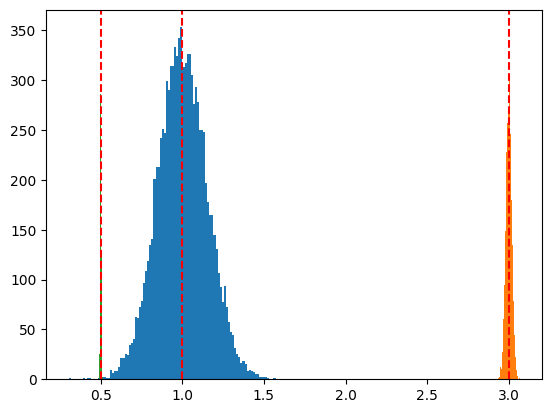

In [19]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([ 1 , 3,  0.5 ])
for _ in range(10000):
    xlin = -10.0 + 20.0 * np.random.random(100)
    ylin = true_beta[0] + (true_beta[1]*xlin) + (true_beta[2]*xlin**2) + np.random.randn(100)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin, xlin**2]).T
    
    beta = np.linalg.inv(np.dot(X.T, X)) @ X.T @ ylin 
    betas.append(beta)

plt.hist(np.array(betas)[:, 0], bins=100)
plt.axvline(x=true_beta[0], c='r', linestyle='dashed')    

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')

plt.hist(np.array(betas)[:, 2], bins=100)
plt.axvline(x=true_beta[2], c='r', linestyle='dashed')

plt.show()